# Project on Retail_Transactions_Dataset

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
os.chdir(r'C:\Users\Mani Koushik\Desktop\datasets')
df=pd.read_csv('a.csv')

## Observation:
- The dataset is loaded into a variable name called `df` means dataframe.
- This dataset contains the data about retail transaction from some retail shops.

In [3]:
df.shape

(1000000, 13)

- The dataset contains `1000000 rows` and `13 columns`.

In [4]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

- The loaded dataset contains contains 13 columns, which are mentioned above.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            988891 non-null   object 
 4   Total_Items        981468 non-null   float64
 5   Total_Cost         981264 non-null   float64
 6   Payment_Method     989239 non-null   object 
 7   City               980433 non-null   object 
 8   Store_Type         986160 non-null   object 
 9   Discount_Applied   988414 non-null   object 
 10  Customer_Category  984068 non-null   object 
 11  Season             983154 non-null   object 
 12  Promotion          985622 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 99.2+ MB


## Observation:
- This gives a basic information about the data like:
    - The column names.
    - The number of not-null values.
    - The data type of the column.
- The data contains `1 boolean`,`1 float`, `2 integer`, `9 object` types in it.

In [6]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3.0,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NO
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2.0,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6.0,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NO
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1.0,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NO
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10.0,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


## Observation:
- This provides us the first 5 rows of the data.

In [7]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,1.000000e+06,981468.000000,981264.000000
mean,1.000500e+09,5.495896,52.454855
std,2.886753e+05,2.871571,27.417988
min,1.000000e+09,1.000000,5.000000
25%,1.000250e+09,3.000000,28.710000
50%,1.000500e+09,5.000000,52.420000
75%,1.000750e+09,8.000000,76.190000
max,1.001000e+09,10.000000,100.000000


## Observation:
- This give the basic statistical analysis on the integer or float data type.
  

In [8]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,1.000000e+06,981468.000000,981264.000000
mean,1.000500e+09,5.495896,52.454855
std,2.886753e+05,2.871571,27.417988
min,1.000000e+09,1.000000,5.000000
25%,1.000250e+09,3.000000,28.710000
50%,1.000500e+09,5.000000,52.420000
75%,1.000750e+09,8.000000,76.190000
max,1.001000e+09,10.000000,100.000000


## Observation:
- This gives the basic analysis on the `object` data type

In [9]:
df.describe(include='object')

,Date,Customer_Name,Product,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
count,1000000,1000000,988891,989239,980433,986160,988414,984068,983154,985622
unique,996337,329738,565979,4,10,6,2,8,4,3
top,2024-03-13 12:44:06,Michael Smith,['Toothpaste'],Cash,Boston,Supermarket,True,Senior Citizen,Spring,NO
freq,3,454,4841,247595,98585,164697,494329,123474,246178,329137


In [10]:
df.isnull().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Product              11109
Total_Items          18532
Total_Cost           18736
Payment_Method       10761
City                 19567
Store_Type           13840
Discount_Applied     11586
Customer_Category    15932
Season               16846
Promotion            14378
dtype: int64

### Observation
- Except the first three columns every column has the null values.
- the columns like `'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'` has the null values between `10000` to `20000`.

In [11]:
df['Transaction_ID'].value_counts()

Transaction_ID
1000000000    1
1000666657    1
1000666659    1
1000666660    1
1000666661    1
             ..
1000333337    1
1000333338    1
1000333339    1
1000333340    1
1000999999    1
Name: count, Length: 1000000, dtype: int64

- Each Transaction has a unique Transaction_id for it, so it has 1000000 Transactions in it.

In [12]:
df['Customer_Name'].value_counts()

Customer_Name
Michael Smith             454
Michael Johnson           341
James Smith               337
David Smith               309
Michael Williams          304
                         ... 
Tyrone Hickman              1
Claudia Richardson          1
Miss Michelle Gonzalez      1
Loretta Anderson            1
Blake Richard               1
Name: count, Length: 329738, dtype: int64

### Obsevation:
- This shows that the stores has repetative customer.
- There are `329738` customers till now across all stores.
- The most regular customer name is `Michael Smith` who bought items `454` times across all stores.

In [13]:
df['Total_Items'].value_counts()

Total_Items
2.0     98624
5.0     98398
6.0     98265
7.0     98222
1.0     98221
8.0     98121
4.0     98016
3.0     97986
10.0    97918
9.0     97697
Name: count, dtype: int64

### Obsevation:
- This shows that the customers are buying between 1 to 10 number of items once at a time.
- And most number of people are buying `2` items at a time.

In [14]:
df['Payment_Method'].value_counts()

Payment_Method
Cash              247595
Debit Card        247440
Credit Card       247295
Mobile Payment    246909
Name: count, dtype: int64

### Obsevation:
- The stores provides `4` types of payment methods like mentioned above.
- Almost every method is used equaly with some minor differences.
- In that `cash` is most used payment method.

In [15]:
df['City'].value_counts()

City
Boston           98585
Dallas           98583
Seattle          98254
Chicago          98079
Houston          98057
New York         98031
Miami            97916
San Francisco    97896
Los Angeles      97858
Atlanta          97174
Name: count, dtype: int64

### Obsevation:
- There are `10` different cities in the dataset.
- Almost every city has same number of coustomers but `boston` has the most number of customers.

In [16]:
df['Store_Type'].value_counts()

Store_Type
Supermarket          164697
Pharmacy             164670
Convenience Store    164395
Warehouse Club       164361
Department Store     164240
Specialty Store      163797
Name: count, dtype: int64

### Obsevation:
- This data is collected from various retail shops like above stores.
- Every store is having nearly equal number of customers.
- But the `super market` has the most number of customers because the daily required products are available in the supermarket.

In [17]:
df['Discount_Applied'].value_counts()

Discount_Applied
True     494329
False    494085
Name: count, dtype: int64

### Obsevation:
- This shows about half of the customers has appiled the Discount.
- About `494329` customers has applied the discount and `494085` customers not applied the discount on the items. 

In [18]:
df['Customer_Category'].value_counts()

Customer_Category
Senior Citizen    123474
Homemaker         123368
Teenager          123318
Retiree           123058
Student           122842
Professional      122736
Middle-Aged       122719
Young Adult       122553
Name: count, dtype: int64

- There are `8` categories in this.
- Every category has the nearly same number of customers but `Senior Citizen` are on the top. 

In [19]:
df['Season'].value_counts()

Season
Spring    246178
Fall      245976
Winter    245582
Summer    245418
Name: count, dtype: int64

- There are `4` seasons in the year.
- in the `Spring` season the customers are more. 

In [20]:
df['Promotion'].value_counts()

Promotion
NO                            329137
Discount on Selected Items    328591
BOGO (Buy One Get One)        327894
Name: count, dtype: int64

- There are `2` types of Promotions available like mentioned above.
- And there are customers who does not have any promotion.

## Some basic details from the data.

- The highest bill from all the stores is:

In [21]:
df['Total_Cost'].max()

100.0

- average bill

In [22]:
df['Total_Cost'].mean()

52.4548545039867

- The lowest bill is:

In [23]:
df['Total_Cost'].min()

5.0

In [24]:
df['Product'].value_counts().head(10)

Product
['Toothpaste']        4841
['Deodorant']         2520
['Honey']             2513
['Eggs']              2492
['Vinegar']           2482
['Cleaning Rags']     2472
['Pasta']             2470
['Cleaning Spray']    2469
['Cereal Bars']       2469
['Olive Oil']         2468
Name: count, dtype: int64

- This are the top `10` itens bought from various stores.
- Most of them are the items that we use daily like `Toothpaste`,`Deodorant`,`Honey` ,etc.

## Checking for duplicates

In [25]:
df.duplicated().sum()

0

- There are no duplicates in the dataset.

## finding outliers.

In [26]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [27]:
outliers = {}

In [28]:
outliers = {}
for col in num_cols:
    if df[col].isnull().all():
        continue  # Skip the columns with all missing values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [29]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


## Phase 2

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            988891 non-null   object 
 4   Total_Items        981468 non-null   float64
 5   Total_Cost         981264 non-null   float64
 6   Payment_Method     989239 non-null   object 
 7   City               980433 non-null   object 
 8   Store_Type         986160 non-null   object 
 9   Discount_Applied   988414 non-null   object 
 10  Customer_Category  984068 non-null   object 
 11  Season             983154 non-null   object 
 12  Promotion          985622 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 99.2+ MB


## Observation:
- This gives a basic information about the data like:
    - The column names.
    - The number of not-null values.
    - The data type of the column.
- The data contains `1 boolean`,`1 float`, `2 integer`, `9 object` types in it.

### Data Cleaning and Manupulation.
- Finding the null values and cleaning it

In [32]:
df.isnull().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Product              11109
Total_Items          18532
Total_Cost           18736
Payment_Method       10761
City                 19567
Store_Type           13840
Discount_Applied     11586
Customer_Category    15932
Season               16846
Promotion            14378
dtype: int64

### Observation
- Except the first three columns every column has the null values.
- the columns like `'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'` has the null values between `10000` to `20000`.

In [36]:
df['Product']=df['Product'].fillna("UNKOWN")

- The null values in the Product column can be replace  or filled with the "UNKOWN" because it does not come under the categorical or numerical column.

In [39]:
columns=['Total_Cost','Total_Items']
for col in columns:
    df[col]=df[col].fillna(round(df[col].mean()))

### Observation:
- The numerical columns like `Total_Cost` and `Total_Items` which has null values can be filled with the mean or average of that column.
- The null values are filled with mean because we dont want the data to filled with invalid values.

In [61]:
columns=['Payment_Method','City','Store_Type','Customer_Category','Season']
for col in columns:
    df[col]=df[col].fillna(df[col].mode()[0])

### Observation:
- The null values in tis columns are filled with the mode of the particular column.
- The missing values are around 1-2%, so it does not affect the data.

In [65]:
df['Discount_Applied']=df['Discount_Applied'].fillna('UNKOWN')
df['Promotion']=df['Promotion'].fillna('UNKOWN')

### Obseration:
- The null values in the `Discount_Applied` and `Promotion` are filled with `UNKOWN`.


In [66]:
df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

- Now the data has no null values.

## Checking Duplicates

In [69]:
df.duplicated().sum()

0

### Observation:
- The data has no duplicate and ready to use for analysis.

### Changing the data types of the columns according to the data.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  float64
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  object 
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          1000000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 99.2+ MB


- The Date has a Object data types.
- So, we need to convert it into a `Date` data type.

In [71]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

- The columns like `Payment_Method` , `Store_Type` , `Customer_category` and `Season` can be converted into category data types.

In [73]:
df=df.astype({'Payment_Method':'category',
              'Store_Type':'category',
             'Customer_Category':'category',
             'Season':'category'})

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  float64       
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  category      
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  category      
 9   Discount_Applied   1000000 non-null  object        
 10  Customer_Category  1000000 non-null  category      
 11  Season             1000000 non-null  category      
 12  Promotion          1000000 non-null  object        
dtypes: category(4), datetime64[n

- Now the data set has columns with related datatypes.

## Non-Visual Bivariate analysis.
- **Categorical vs Categorical**
    - Relation between two categorical columns,  `Payment_Method` and `Customer_Category`.

In [75]:
df.groupby(['Payment_Method','Customer_Category'])['Total_Cost'].mean().unstack()

Customer_Category,Homemaker,Middle-Aged,Professional,Retiree,Senior Citizen,Student,Teenager,Young Adult
Payment_Method,,,,,,,,
Cash,52.549626,52.331579,52.823737,52.522719,52.229736,52.650315,52.282553,52.486651
Credit Card,52.555105,52.437238,52.346593,52.434280,52.387524,52.440338,52.744168,52.551003
Debit Card,52.316198,52.353266,52.274808,52.416226,52.224605,52.499176,52.476774,52.280545
Mobile Payment,52.349769,52.565637,52.534238,52.358282,52.556457,52.367576,52.555125,52.416629


- It shows the average amount spent by the customers according to the category division.
- And, we can see that almost every division has the same average. 

- **Categorical vs Numerical**
    - Relation between categorical and numerical columns,`Store_Type` and `Total_Cost`.

In [76]:
df.groupby('Store_Type')[['Total_Items']].mean()

,Total_Items
Store_Type,
Convenience Store,5.495587
Department Store,5.487403
Pharmacy,5.486968
Specialty Store,5.497683
Supermarket,5.478517
Warehouse Club,5.474821


- The average number of items bought in every store id about `5.5`.
- That means every store has almost same number of items purchased in total.

- **Numerical vs Numerical**
    - Relation between two numerical columns,`Total_Items` and `Total_Cost`.

In [77]:
df[['Total_Items','Total_Cost']].corr()

,Total_Items,Total_Cost
Total_Items,1.000000,0.000167
Total_Cost,0.000167,1.000000


## Final Summary
- Issues in raw data:
  - Null values in the Promotion column.
  - Irrelavent datatypes for the columns.

#### Resolving the issues
- The missing or null values were replaced with some valid value according to the dataset.
- The datatype of the columns changed according to the data inside the columns

## Data Visualization on the dataset.

#### Types of visualizatons:
- There are three types of visualizations
    - Univariate analysis.
    - Bivariate analysis.
    - Multivariate analysis.

### 1.Univariate analysis for each column in the DataFrame according to it`s datatype.
- First the categorical columns:`'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'`

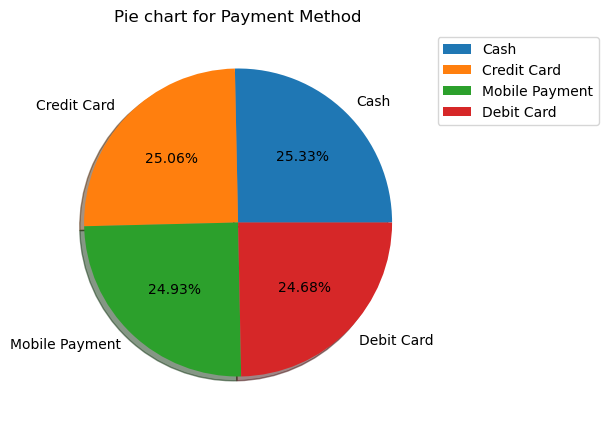

In [200]:
# Univariate analysis on payment_method
payment=df['Payment_Method'].sample(10000).value_counts()
plt.figure(figsize=(5,5))
plt.pie(payment,labels=payment.index,autopct='%.2f%%',shadow=True)
plt.legend(bbox_to_anchor=(1,1) )
plt.title("Pie chart for Payment Method")
plt.show();



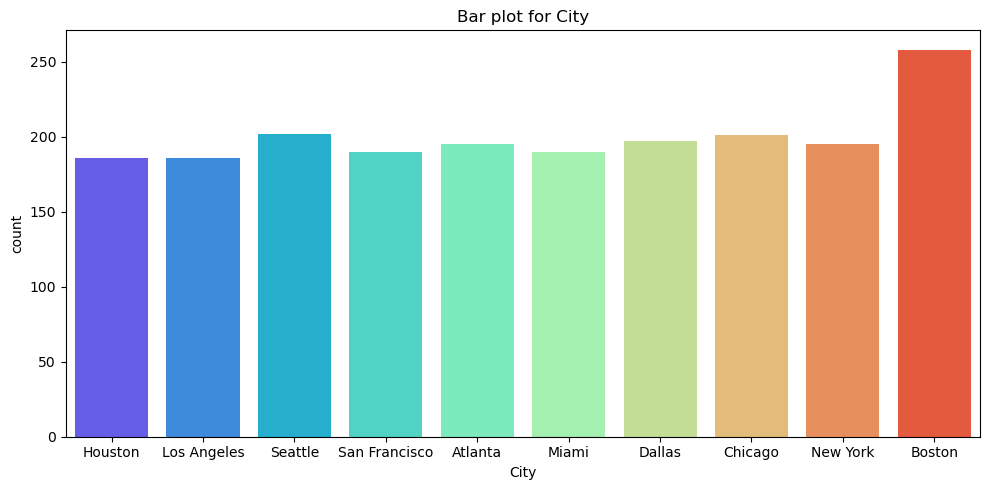

In [206]:
# Univariate analysis on City:
plt.figure(figsize=(10,5))
sns.countplot(data=df.sample(2000),x='City',palette='rainbow')

plt.title("Bar plot for City")
plt.tight_layout()
plt.show()

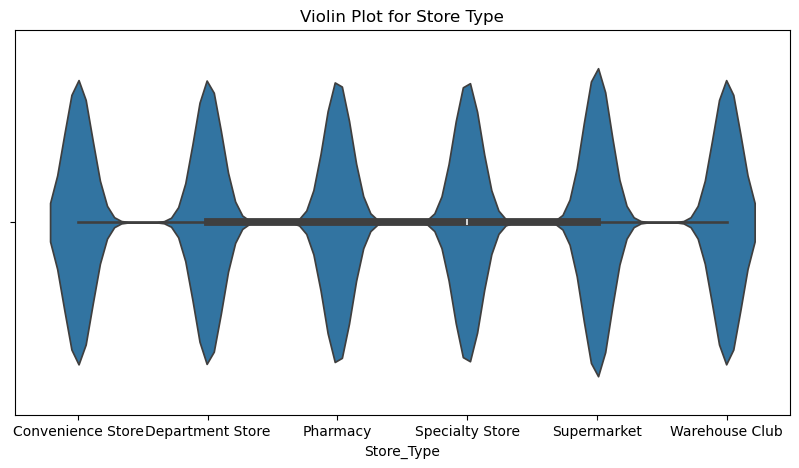

In [100]:
# Univariate analysis on Store_Type:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='Store_Type')
plt.title('Violin Plot for Store Type')
plt.show();

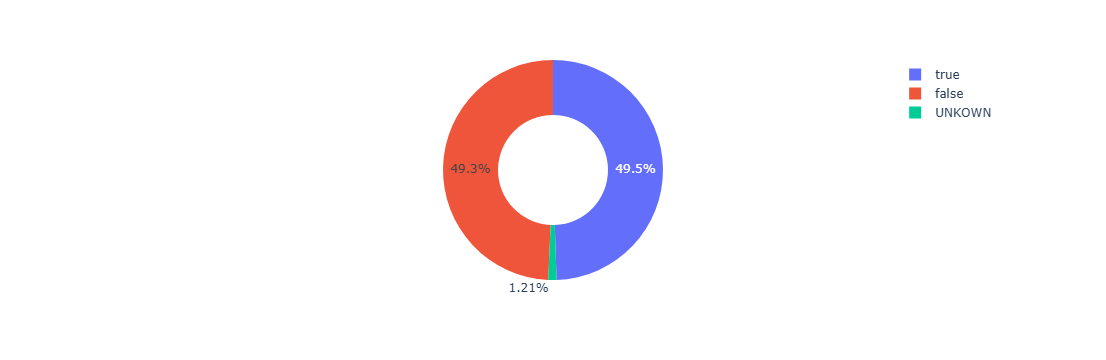

In [199]:
# Univariate analysis on Discount_Applied:
px.pie(data_frame=df.sample(10000),names='Discount_Applied',hole=0.5)

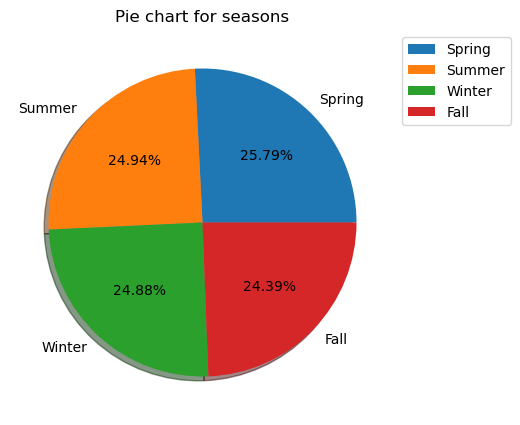

In [198]:
# Univariate analysis on Season
sea=df['Season'].sample(10000).value_counts()
plt.figure(figsize=(5,5))
plt.pie(sea,labels=sea.index,autopct='%.2f%%',shadow=True)
plt.legend(bbox_to_anchor=(1,1) )
plt.title("Pie chart for seasons")
plt.show();



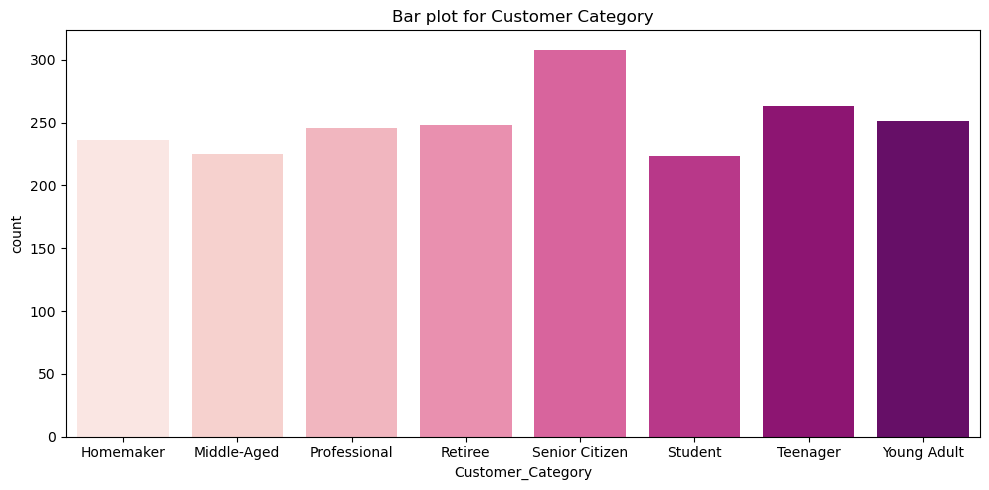

In [208]:
# Univariate analysis on Customer_Category:
plt.figure(figsize=(10,5))
sns.countplot(data=df.sample(2000),x='Customer_Category',palette='RdPu')

plt.title("Bar plot for Customer Category")
plt.tight_layout()
plt.show()

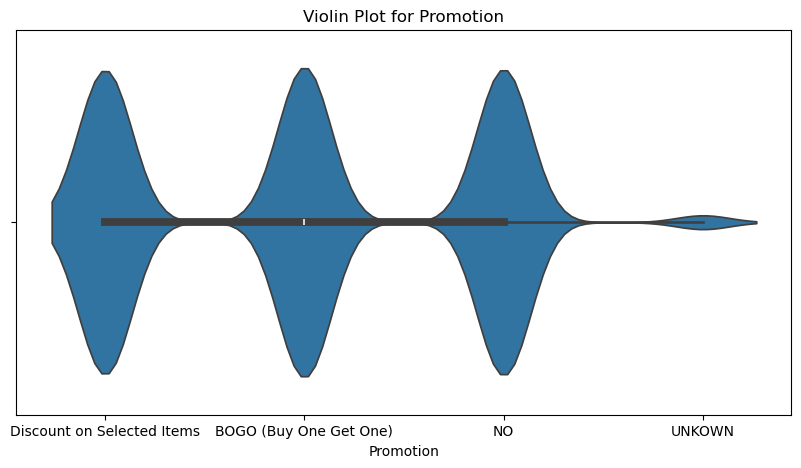

In [192]:
# Univariate analysis on Promotion:
plt.figure(figsize=(10,5))
sns.violinplot(data=df.sample(10000),x='Promotion')
plt.title('Violin Plot for Promotion')
plt.show();

## Univariate analysis foe numerical columns:


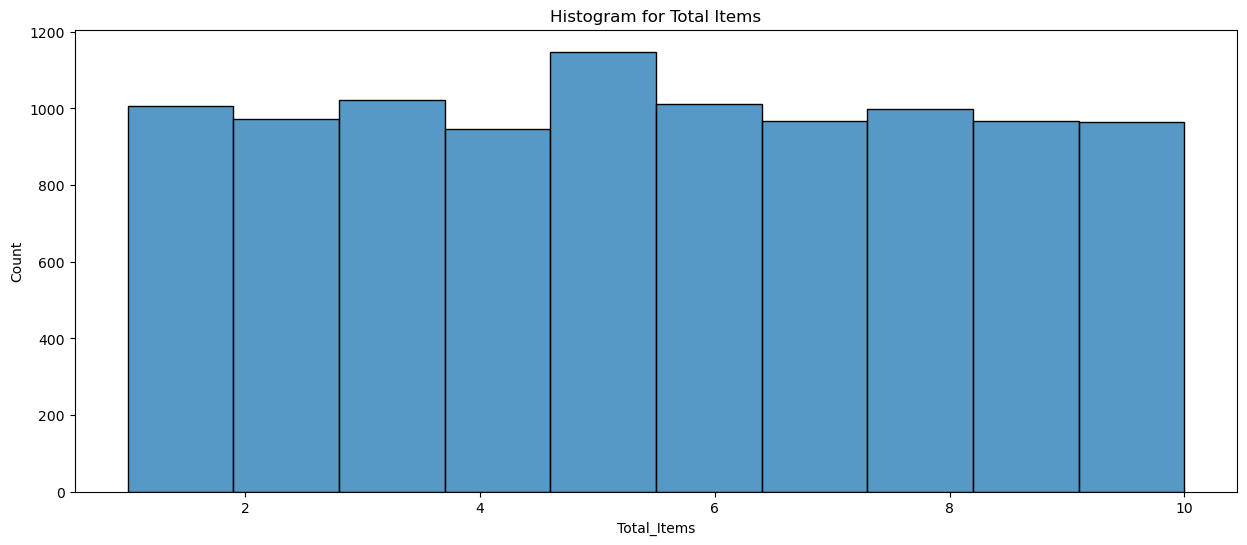

In [211]:
# univariate analysis for Total_Items:
plt.figure(figsize=(15,6))
sns.histplot(data=df.sample(10000),x='Total_Items',bins=10)
plt.title('Histogram for Total Items')
plt.show();

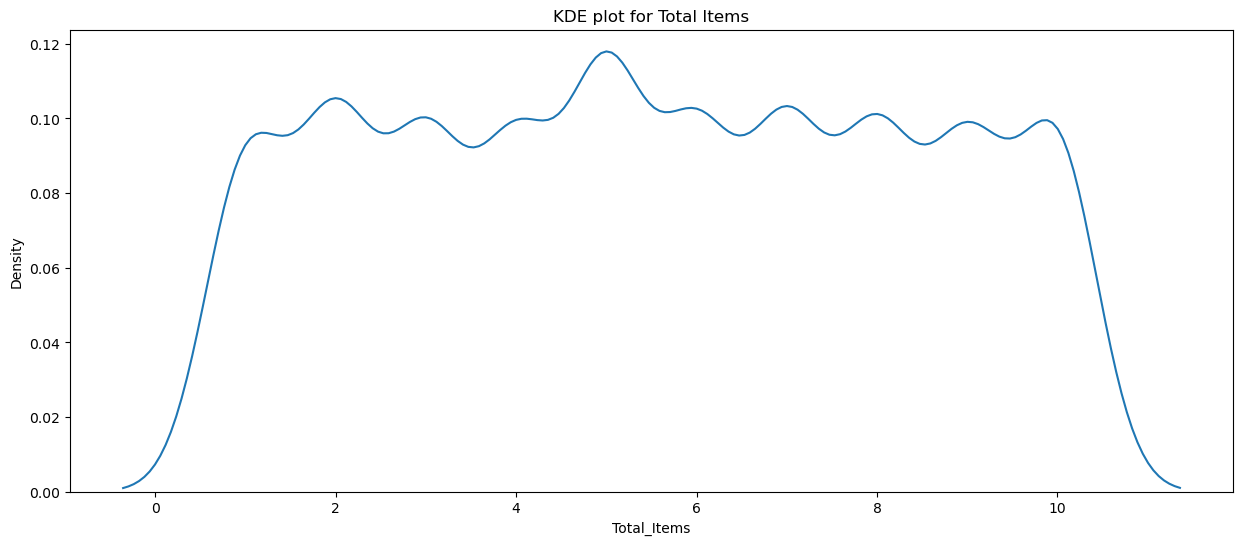

In [190]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df.sample(10000),x='Total_Items')
plt.title('KDE plot for Total Items')
plt.show();

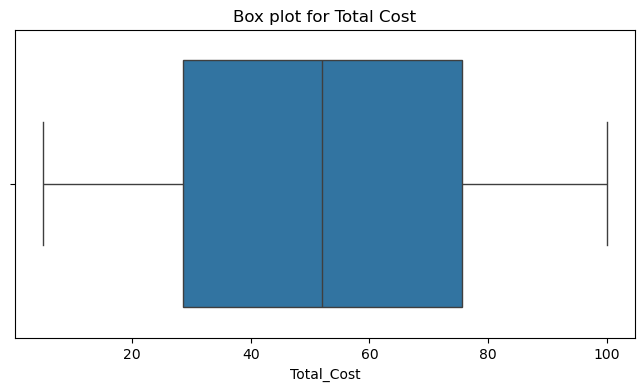

In [191]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.sample(10000),x='Total_Cost')
plt.title('Box plot for Total Cost')
plt.show();

Text(0.5, 1.0, 'Historam with KDE for Total Cost')

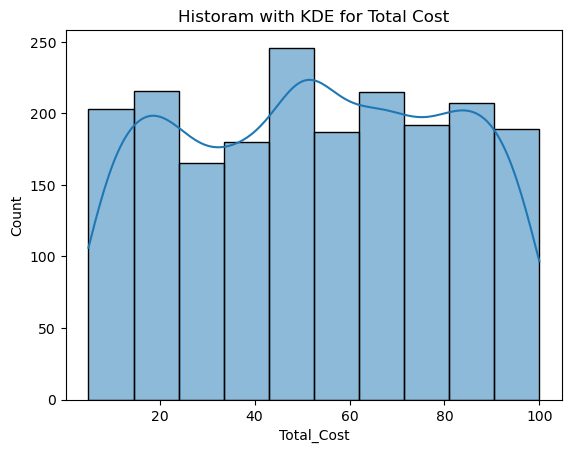

In [188]:
# Univariate analysis for Total_cost:

sns.histplot(data=df.sample(2000),x='Total_Cost',bins=10,kde=True)
plt.title('Historam with KDE for Total Cost')

## Bivariate analysis
- There are three types in Bivariate analysis:
    - categorical vs categorical.
    - categorical vs Numerical.
    - Numerical vs Numerical.

### 1.categorical vs categorical.

In [132]:
a=pd.crosstab(df['City'],df['Customer_Category'])

<Axes: xlabel='Customer_Category', ylabel='City'>

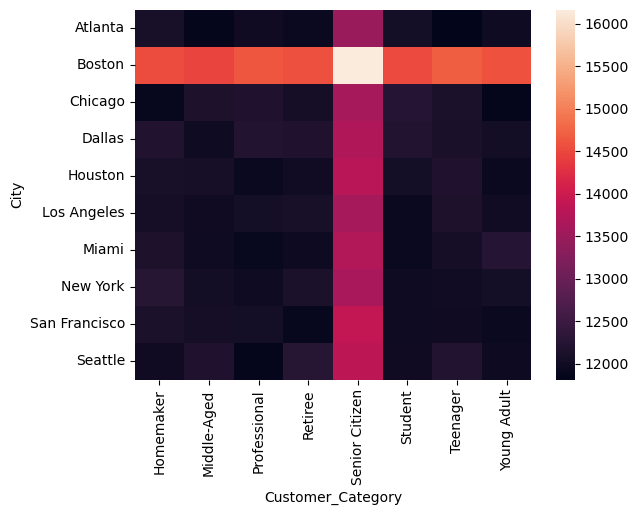

In [135]:
sns.heatmap(a)

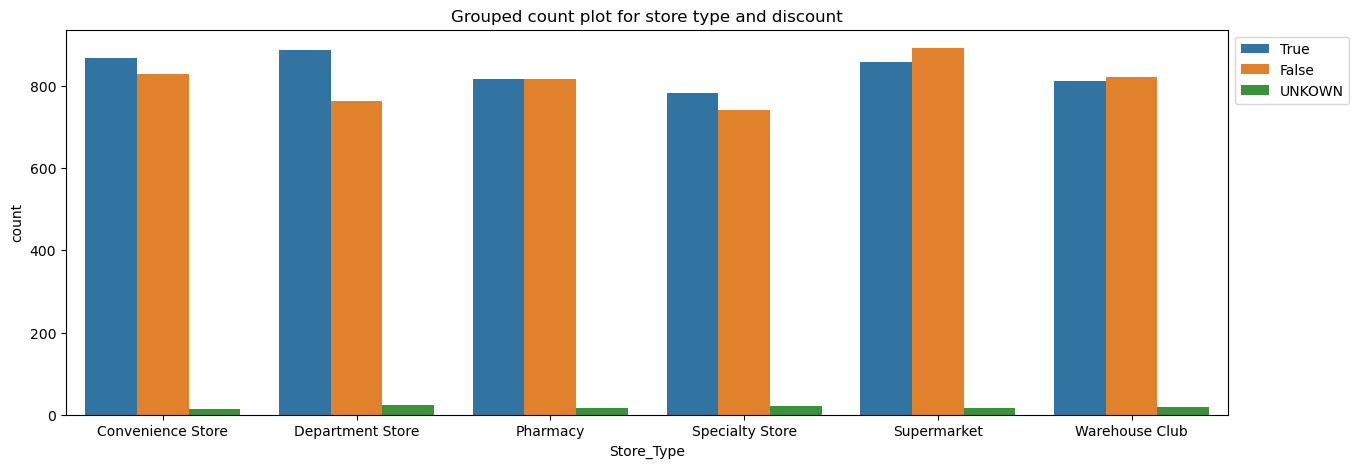

In [254]:
plt.figure(figsize=(15,5))
sns.countplot(data=df.sample(10000),x='Store_Type',hue='Discount_Applied')
plt.title("Grouped count plot for store type and discount")
plt.legend(bbox_to_anchor=(1,1))

<Figure size 1000x600 with 0 Axes>

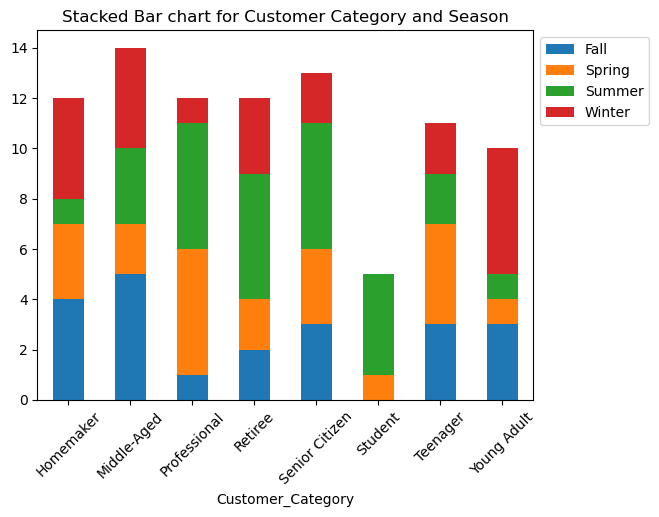

In [181]:
plt.figure(figsize=(10,6))
pd.crosstab(df['Customer_Category'].sample(10000),df['Season'].sample(10000)).plot(kind='bar',stacked=True)
plt.title('Stacked Bar chart for Customer Category and Season')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.show();

## Categorical vs Numerical:

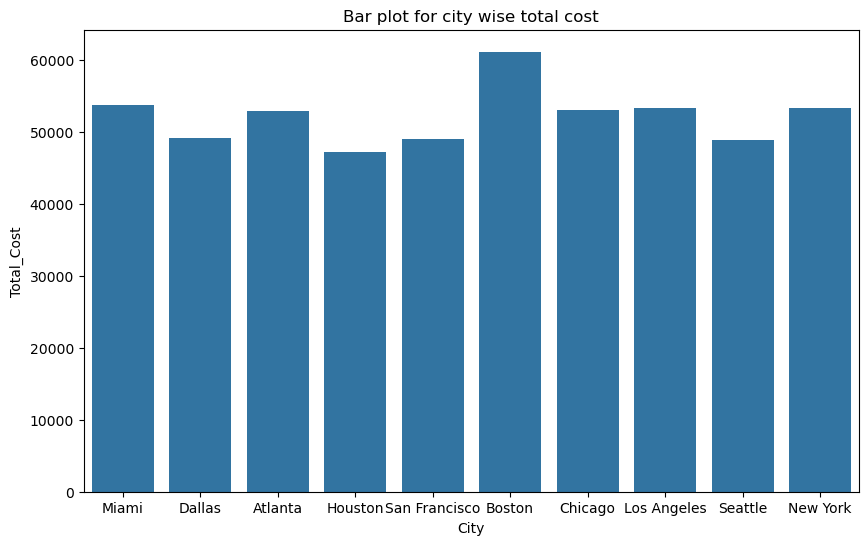

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sample(10000),x='City',y='Total_Cost',ci=False,estimator='sum')
plt.title("Bar plot for city wise total cost")
plt.show();

Text(0.5, 1.0, 'strip plot of Customer Category wise for Total Cost')

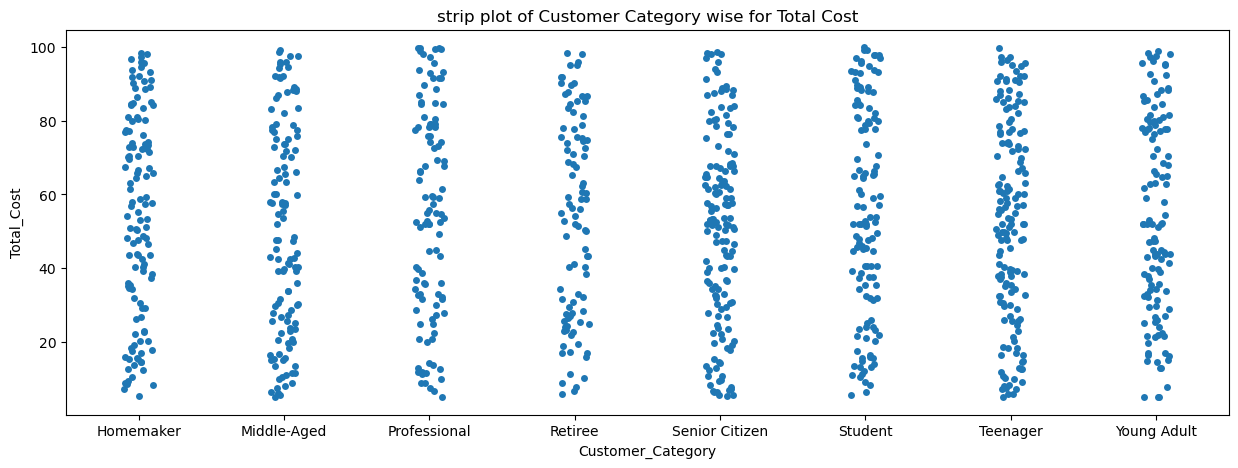

In [176]:
plt.figure(figsize=(15,5))
sns.stripplot(data=df.sample(1000),x='Customer_Category',y='Total_Cost')
plt.title("strip plot of Customer Category wise for Total Cost")

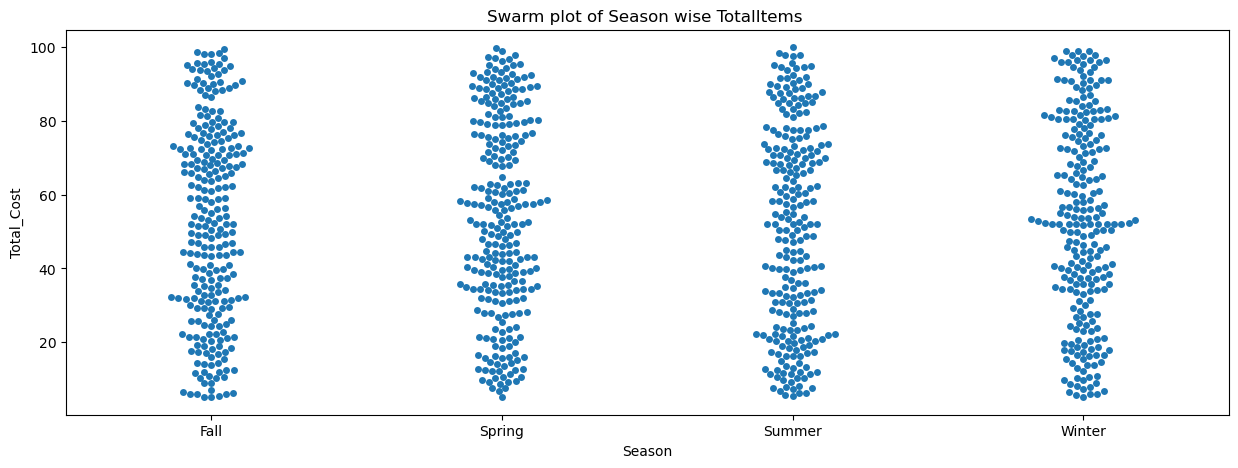

In [175]:
plt.figure(figsize=(15,5))
sns.swarmplot(data=df.sample(1000),x='Season',y='Total_Cost')
plt.title('Swarm plot of Season wise TotalItems ')
plt.show();

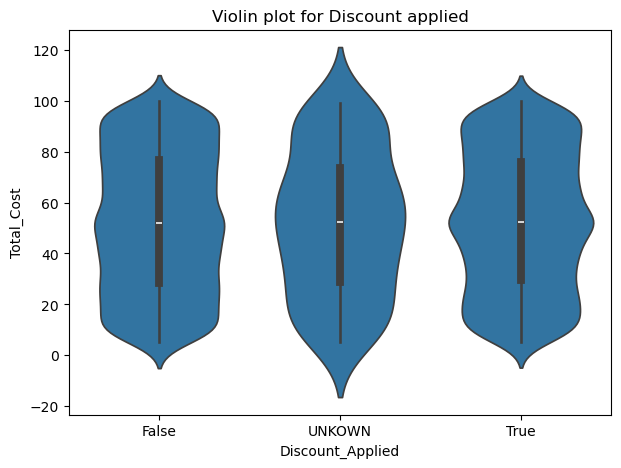

In [217]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df.sample(10000),x='Discount_Applied',y='Total_Cost')
plt.title("Violin plot for Discount applied")
plt.show();

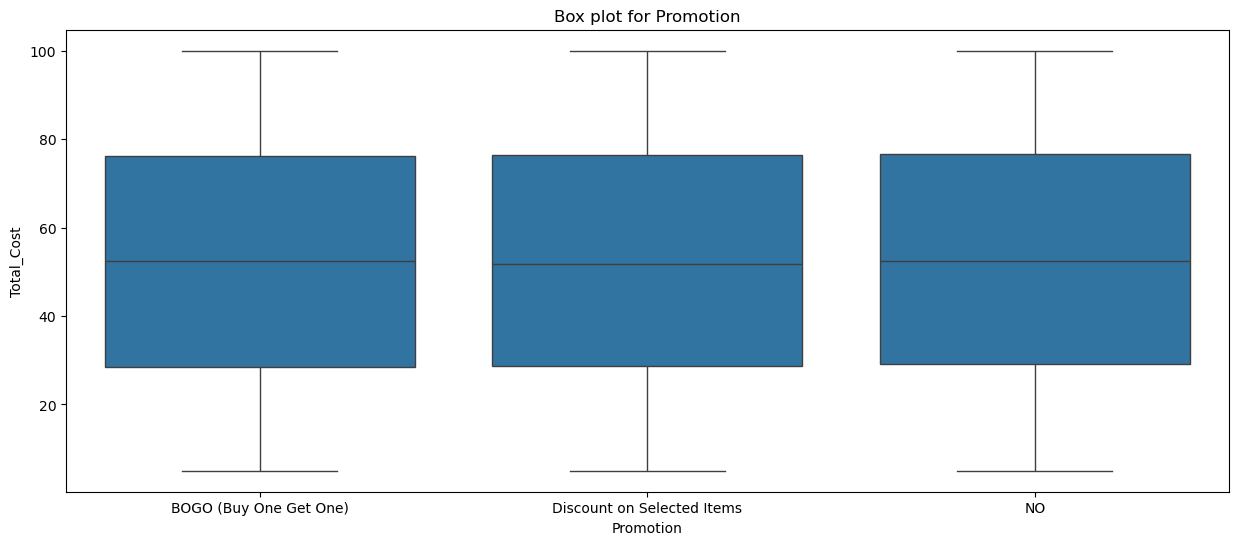

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df.sample(10000),x='Promotion',y='Total_Cost')
plt.title("Box plot for Promotion")
plt.show();

## Numerical vs Numerical:


Text(0.5, 1.0, 'Scatter plot for Total Items and Total Cost')

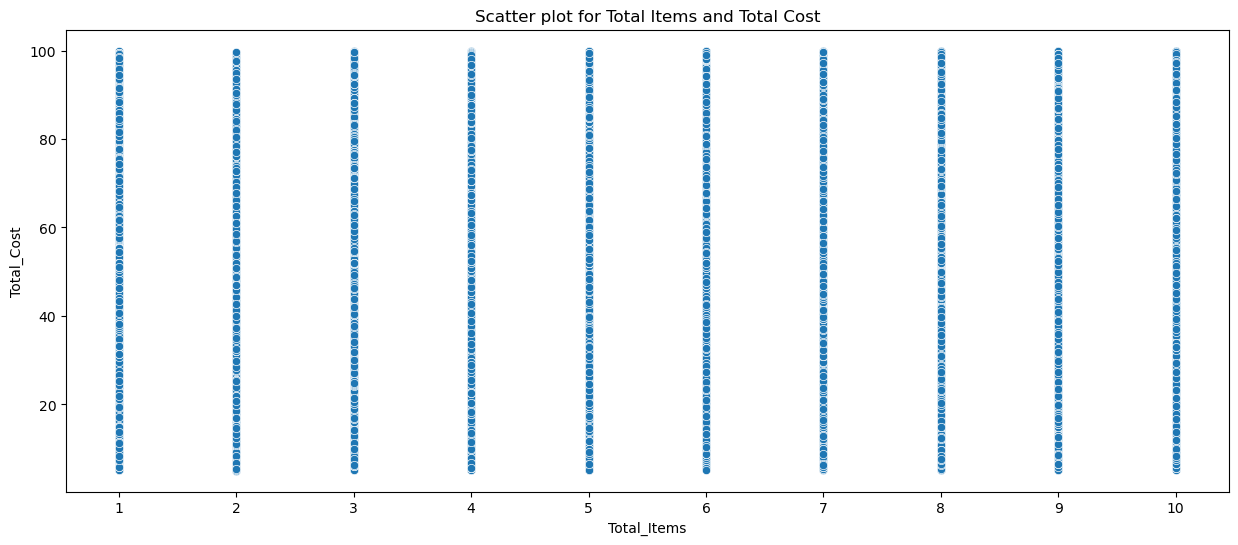

In [223]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df.sample(10000),x='Total_Items',y='Total_Cost')
plt.xticks(range(1,11))
plt.title('Scatter plot for Total Items and Total Cost')

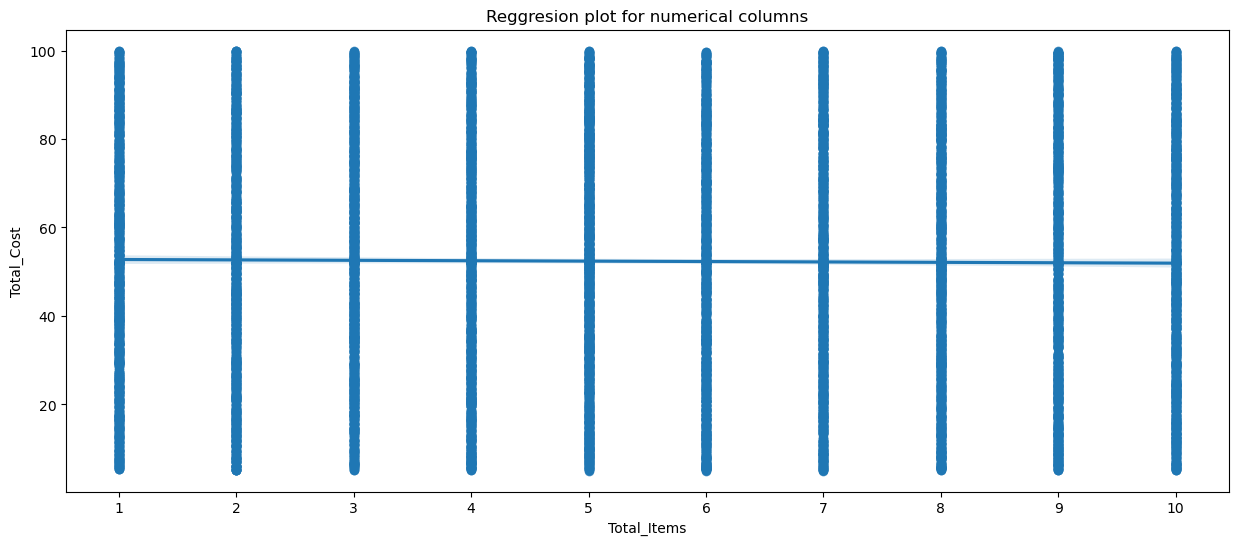

In [226]:
plt.figure(figsize=(15,6))
sns.regplot(data=df.sample(10000),x='Total_Items',y='Total_Cost')
plt.xticks(range(1,11))
plt.title('Reggresion plot for numerical columns')
plt.show();

## Multivariate Analysis:

In [233]:
df['date_qtr_year']=df['Date'].dt.to_period('Q')

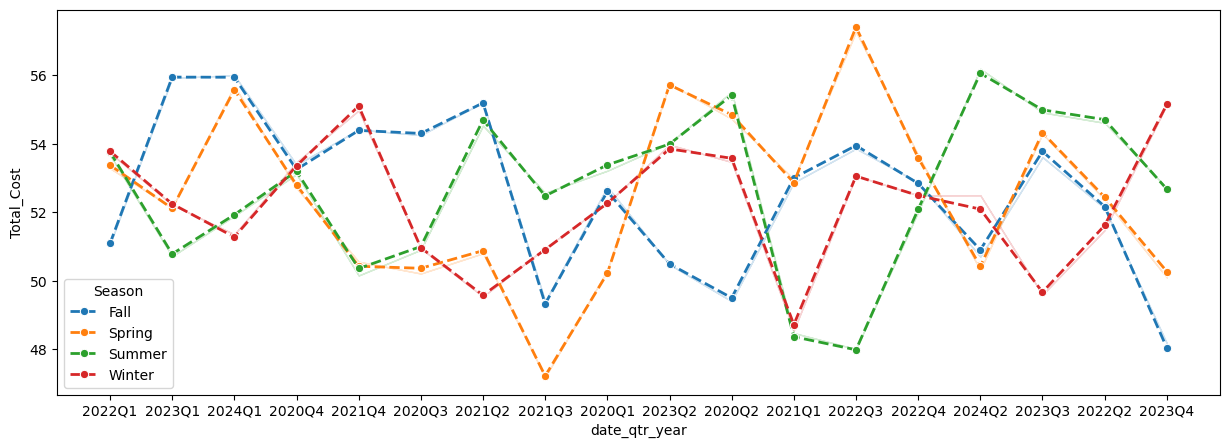

In [240]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df.sample(10000),x=df['date_qtr_year'].astype(str),y='Total_Cost',
             hue='Season',ci=False,lw=2,ls='--',marker='o')
plt.show();

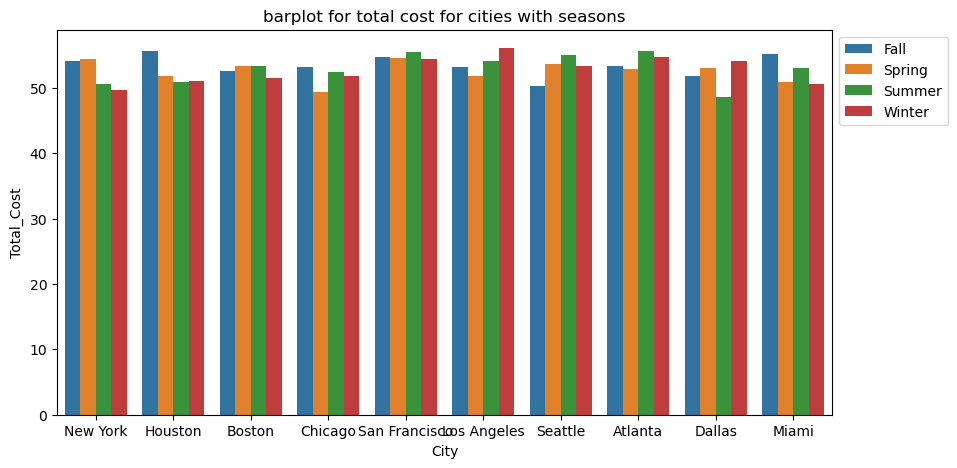

In [243]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.sample(10000),x='City',y='Total_Cost',hue='Season',ci=False)
plt.title('barplot for total cost for cities with seasons')
plt.legend(bbox_to_anchor=(1,1))
plt.show();


In [256]:
heat=pd.pivot_table(data=df,index='Payment_Method',columns='Store_Type',values='Total_Cost')

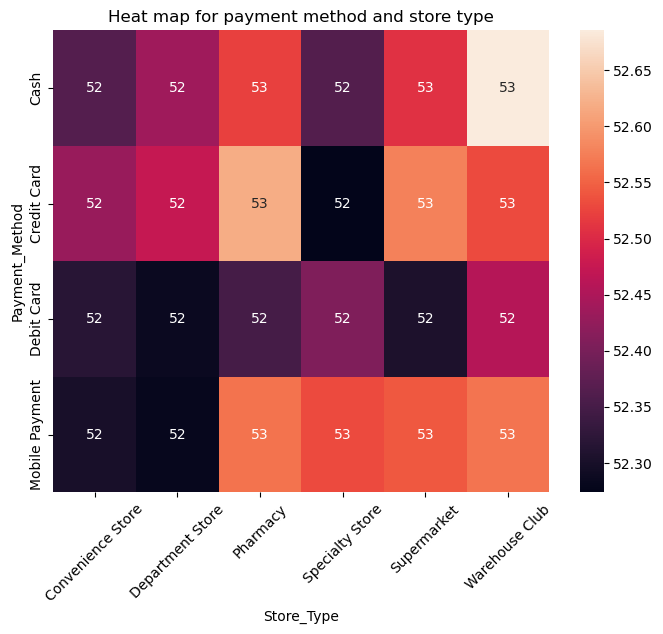

In [261]:
plt.figure(figsize=(8,6))
sns.heatmap(heat,annot=True,fmt)
plt.xticks(rotation=45)
plt.title('Heat map for payment method and store type')
plt.show();